First, the data seems to have a lot of duplicates.

In [12]:
with open('../data/orig_names.txt', 'r', encoding='utf-8') as f:
  names = f.readlines()

names = [name.strip() for name in names if name.strip()]

print(f"{len(names)=}")

unique_entries = set(names)
print(f"{len(unique_entries)=}")

print("~~Garbage~~ Irrelevant Data Anteil: ", 100 - (len(unique_entries) / len(names)) * 100)

len(names)=62262
len(unique_entries)=38621
~~Garbage~~ Irrelevant Data Anteil:  37.970190485368285


Sad. Maybe I get the data from a better source. For now, let's train using the ~40000 entries set. 

In [13]:
with open('../data/names.txt', 'w', encoding='utf-8') as f:
  for name in unique_entries:
    f.write(name + '\n')

In [14]:
max_len = max(len(w) for w in unique_entries)
max_len_word = [w for w in unique_entries if len(w) == max_len]

max_len, len(max_len_word), max_len_word

(54, 1, ['Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln'])

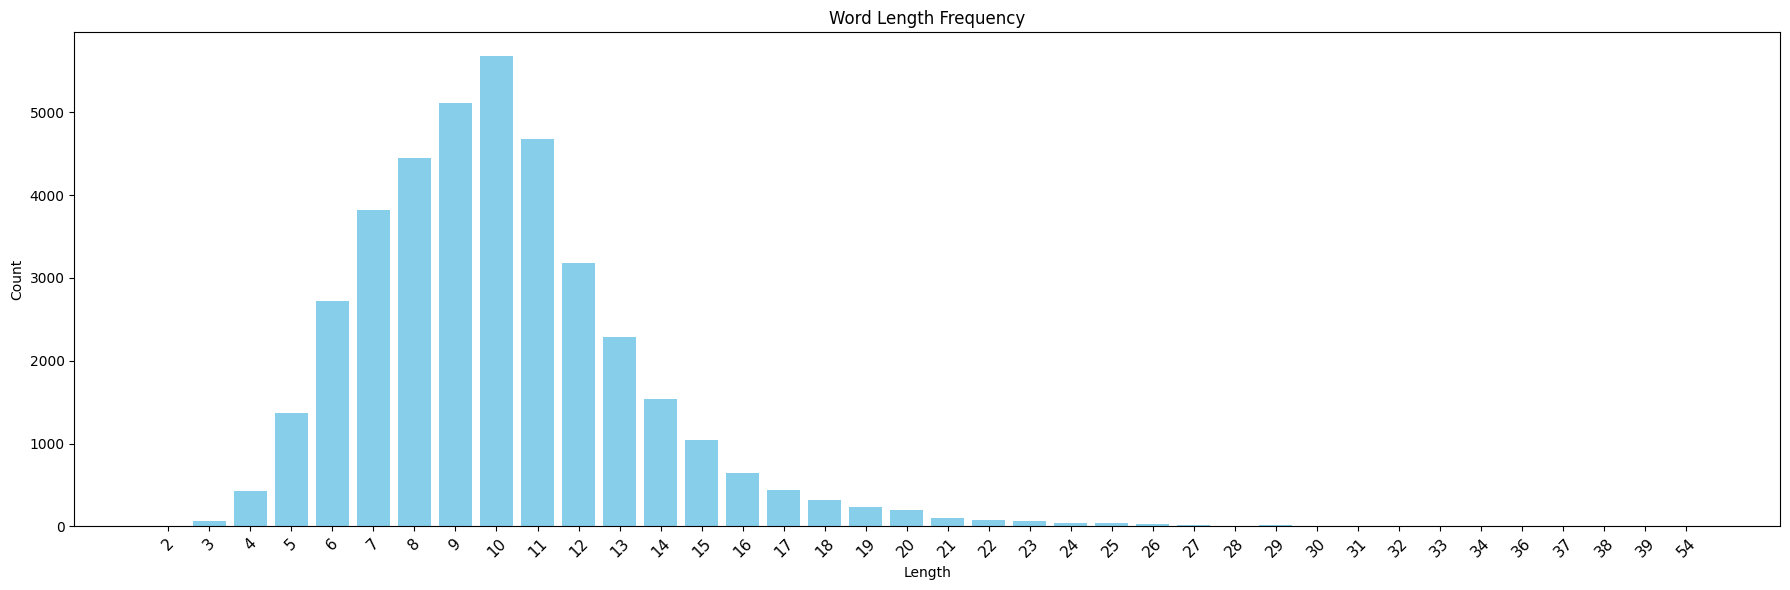

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

length_counts = Counter(len(w) for w in unique_entries)

lengths = sorted(length_counts.keys())
counts = [length_counts[l] for l in lengths]

# Convert lengths to strings to treat them as categories
lengths_str = list(map(str, lengths))

plt.figure(figsize=(18, 6))
plt.bar(lengths_str, counts, color='skyblue')

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Word Length Frequency')

plt.xticks(rotation=45, fontsize=11)  

plt.tight_layout()
plt.show()


In [ ]:
[w for w in unique_entries if len(w) <= 3 or len(w) >= 20][:15] # seem like actual names

['Beiersdorf bei Coburg',
 'Elm',
 'Martinlamitzer Forst-Nord',
 'Holzhausen bei Teisendorf',
 'Schneeberg im Odenwald',
 'Gewerbegebiet Kesselpoint',
 'Bayreuther Schneidmühle',
 'Ob',
 'Aeußerer Dachsbuckel',
 'Hör',
 'Hohenaschau im Chiemgau',
 'Jüngere Keltenschanze',
 'Neustadt an der Donau',
 'Betriebshafen Außenbezirk Regensburg',
 'Königshofen an der Heide']

In [35]:
bindestrich = [w for w in unique_entries if "-" in w]
bindestrich[:10], len(bindestrich)

(['Martinlamitzer Forst-Nord',
  'Ödhäusl-Diensthütte',
  'Schmalensee-Höhe',
  'Dornstadt-Linkersbaindt',
  'Mögelins-Schlößlein',
  'Selb-Plößberg',
  'Hochschul- und Forschungszentrum',
  'Ebenhausen-Werk',
  'Entwies-Siedlung',
  'Weiler-Simmerberg'],
 254)

In [ ]:
all_chars = ''.join(list(sorted(set(''.join(unique_entries))))) 
all_chars # - seems to be the only "special" character. lassen wir drin.

' -ABCDEFGHIJKLMNOPQRSTUVWXZabcdefghijklmnopqrstuvwxyzÄÖÜßäöü'